**10주차 실습 - N-gram 시각화**

#1. N-gram 분포 시각화

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import movie_reviews

from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [3]:
# 영화 리뷰 로드
nltk.download("movie_reviews")

# 긍정/부정 리뷰를 리스트로 각각 저장
positive_reviews = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids('pos')]
negative_reviews = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids('neg')]

# 긍정/부정 리뷰를 하나의 DataFrame으로 저장
df = pd.concat([pd.DataFrame(positive_reviews), pd.DataFrame(negative_reviews)])

# 컬럼명을 'review'로 변경
df = df.rename(columns={0: "review"})

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/soma/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


In [4]:
df


review
0    films adapted from comic books have had plenty...
1    every now and then a movie comes along from a ...
2    you've got mail works alot better than it dese...
3     " jaws " is a rare film that grabs your atten...
4    moviemaking is a lot like being the general ma...
..                                                 ...
995  if anything , " stigmata " should be taken as ...
996  john boorman's " zardoz " is a goofy cinematic...
997  the kids in the hall are an acquired taste . \...
998  there was a time when john carpenter was a gre...
999  two party guys bob their heads to haddaway's d...

[2000 rows x 1 columns]

In [5]:
# n-gram 빈도 시각화를 위한 텍스트 전처리 함수
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')
    return ReviewText

df['review'] = preprocess(df['review'])

In [6]:
df

review
0    films adapted from comic books have had plenty...
1    every now and then a movie comes along from a ...
2    you've got mail works alot better than it dese...
3     " jaws " is a rare film that grabs your atten...
4    moviemaking is a lot like being the general ma...
..                                                 ...
995  if anything , " stigmata " should be taken as ...
996  john boorman's " zardoz " is a goofy cinematic...
997  the kids in the hall are an acquired taste . \...
998  there was a time when john carpenter was a gre...
999  two party guys bob their heads to haddaway's d...

[2000 rows x 1 columns]

In [7]:
# 가장 많이 등장하는 n-gram을 추출하는 함수
def get_top_ngrams(corpus, ngram_range, stop_words=None, n=None):
    vec = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)

    sum_words = bag_of_words.sum(axis=0)

    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    common_words = words_freq[:n]
    words = []
    freqs = []
    for word, freq in common_words:
        words.append(word)
        freqs.append(freq)

    df = pd.DataFrame({'Word': words, 'Freq': freqs})
    return df

In [8]:
# 가장 많이 등장하는 n-gram
stop_words = 'english'
n = 20
unigrams_st = get_top_ngrams(df['review'], (1, 1), stop_words, n)
bigrams_st = get_top_ngrams(df['review'], (2, 2), stop_words, n)
trigrams_st = get_top_ngrams(df['review'], (3, 3), stop_words, n)

In [9]:
trigrams_st


Word  Freq
0        know did summer    59
1          new york city    53
2        tommy lee jones    44
3    saving private ryan    43
4         jay silent bob    40
5    blair witch project    36
6          does good job    33
7         wild wild west    31
8       film takes place    27
9      freddie prinze jr    27
10         movie ve seen    26
11   saturday night live    26
12          world war ii    25
13    little known facts    24
14           ve got mail    23
15       jean claude van    22
16      claude van damme    22
17        obi wan kenobi    21
18        meet joe black    21
19  jennifer love hewitt    20

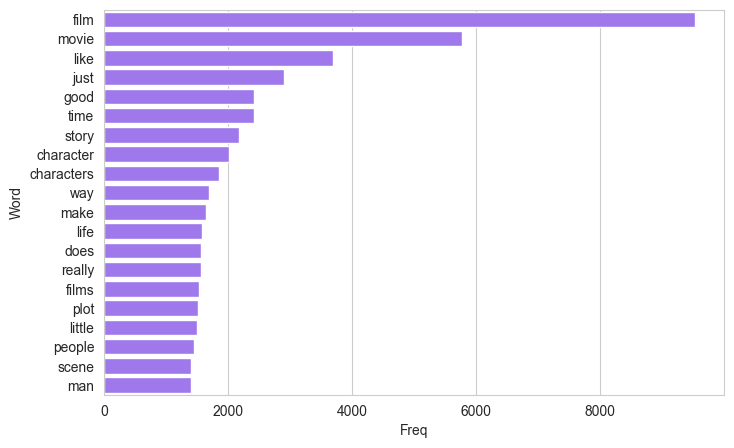

In [10]:
colors = ['#9966ff', '#3399ff', '#00ff00', '#ff6600']

plt.subplots(figsize=(8, 5))
sns.barplot(x='Freq', y='Word', color=colors[0], data=unigrams_st)
plt.show()

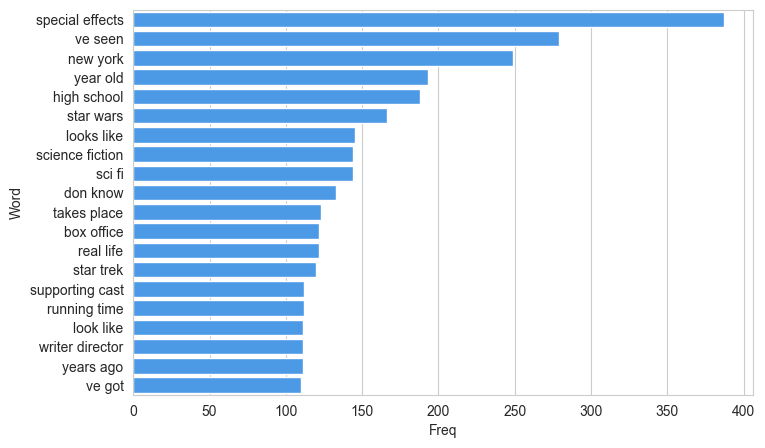

In [11]:
colors = ['#9966ff', '#3399ff', '#00ff00', '#ff6600']

plt.subplots(figsize=(8, 5))
sns.barplot(x='Freq', y='Word', color=colors[1], data=bigrams_st)
plt.show()

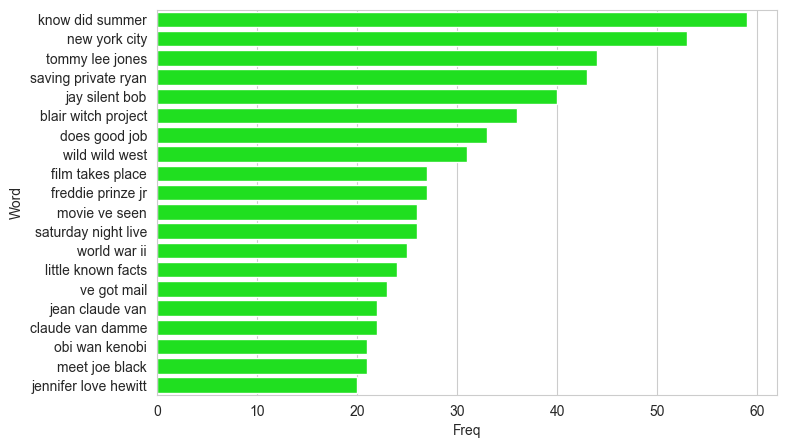

In [12]:
plt.subplots(figsize=(8, 5))
sns.barplot(x='Freq', y='Word', color=colors[2], data=trigrams_st)
plt.show()

#2. 워드 클라우드

In [15]:
from wordcloud import WordCloud

# 워드 클라우드 함수를 사용하기 위해 빈도 DataFrame을 dictionary로 변환
unigrams_st_dict = {word: freq for word, freq in zip(unigrams_st['Word'], unigrams_st['Freq'])}

In [16]:
unigrams_st_dict

{'film': 9517,
 'movie': 5771,
 'like': 3690,
 'just': 2905,
 'good': 2411,
 'time': 2411,
 'story': 2169,
 'character': 2020,
 'characters': 1859,
 'way': 1693,
 'make': 1642,
 'life': 1586,
 'does': 1568,
 'really': 1558,
 'films': 1536,
 'plot': 1513,
 'little': 1501,
 'people': 1455,
 'scene': 1397,
 'man': 1396}

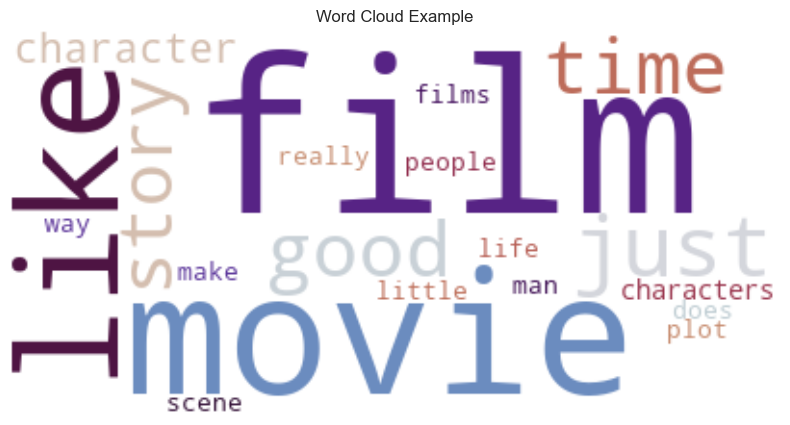

In [17]:
# background_color: 배경색, colormap: 글자색
wordcloud_uni = WordCloud(background_color="white",
                          colormap="twilight_shifted").generate_from_frequencies(unigrams_st_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_uni, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud Example")
plt.show()

In [18]:
# 워드 클라우드 함수를 사용하기 위해 빈도 DataFrame을 dictionary로 변환
bigrams_st_dict = {word: freq for word, freq in zip(bigrams_st['Word'], bigrams_st['Freq'])}
bigrams_st_dict

{'special effects': 387,
 've seen': 279,
 'new york': 249,
 'year old': 193,
 'high school': 188,
 'star wars': 166,
 'looks like': 145,
 'science fiction': 144,
 'sci fi': 144,
 'don know': 133,
 'takes place': 123,
 'box office': 122,
 'real life': 122,
 'star trek': 120,
 'supporting cast': 112,
 'running time': 112,
 'look like': 111,
 'writer director': 111,
 'years ago': 111,
 've got': 110}

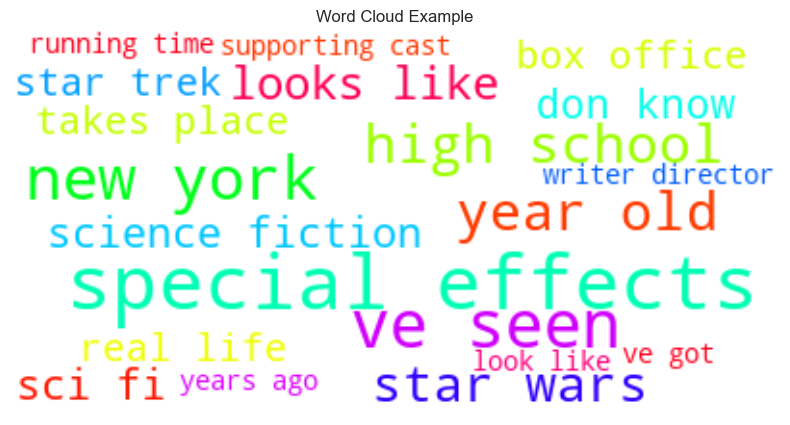

In [19]:
wordcloud_bi = WordCloud(background_color="white",
                         colormap="hsv").generate_from_frequencies(bigrams_st_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_bi, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud Example")
plt.show()

In [20]:
# 워드 클라우드 함수를 사용하기 위해 빈도 DataFrame을 dictionary로 변환
trigrams_st_dict = {word: freq for word, freq in zip(trigrams_st['Word'], trigrams_st['Freq'])}
trigrams_st_dict

{'know did summer': 59,
 'new york city': 53,
 'tommy lee jones': 44,
 'saving private ryan': 43,
 'jay silent bob': 40,
 'blair witch project': 36,
 'does good job': 33,
 'wild wild west': 31,
 'film takes place': 27,
 'freddie prinze jr': 27,
 'movie ve seen': 26,
 'saturday night live': 26,
 'world war ii': 25,
 'little known facts': 24,
 've got mail': 23,
 'jean claude van': 22,
 'claude van damme': 22,
 'obi wan kenobi': 21,
 'meet joe black': 21,
 'jennifer love hewitt': 20}

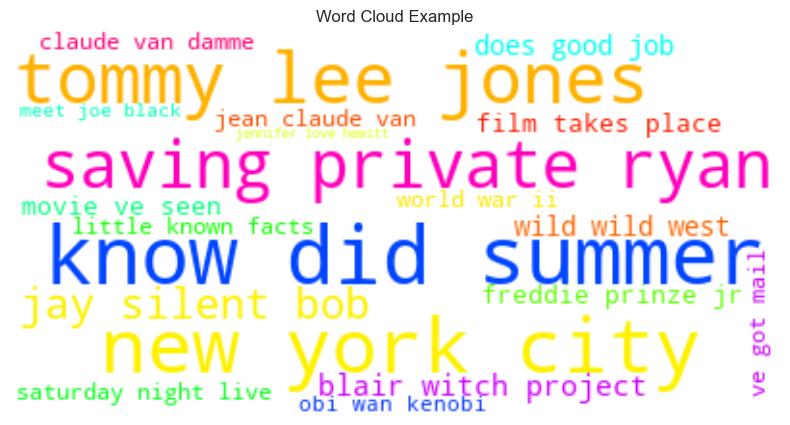

In [21]:
wordcloud_tri = WordCloud(background_color="white",
                          colormap="hsv").generate_from_frequencies(trigrams_st_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_tri, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud Example")
plt.show()

# 3. Bi-gram 네트워크 시각화

In [24]:
#load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
from matplotlib.patches import Rectangle

import pandas as pd
import statsmodels.api as sm

import os

import itertools
import collections

#---NLP packages--------------------
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
from nltk.util import ngrams
nltk.download('stopwords')

#----process string-------
import string
import re

#---network visualization-----------
import re
import networkx as nx

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /Users/soma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
# 텍스트 전처리 함수
def clean_text(sentence):
    sentence = re.sub("[%s]" % re.escape(string.punctuation), "", sentence.lower())
    sentence = re.sub("([^\x00-\x7F])+", " ", sentence)
    sentence = sentence.replace('\n', ' ').replace('.', ' ').replace(',', ' ').replace('?', ' ')\
    .replace('\r', ' ').replace('!', ' ').replace('"\r', ' ').replace('"', ' ')\
    .replace("'", ' ').replace("''", ' ').replace('(', ' ').replace(')', ' ').replace(']', ' ')\
    .replace('-', ' ').replace('/', ' ')

    while ('  ' in sentence):
        sentence = sentence.replace('  ', ' ')
    return sentence

In [26]:
eng_stopwords = set(stopwords.words('english')) | {''}

In [27]:
# 불용어 제거 함수
def get_words(sentence, stopwords):
    words = set(sentence.split(' '))
    words = list(words-set(stopwords))
    if '' in words:
        words.remove('')
    return list(words)

In [28]:
txts = df['review'].values.tolist()
words_in_text = []
for txt in txts:
    txt = clean_text(txt)
    words_in_text.append(get_words(txt, eng_stopwords))

In [29]:
words_in_text

[['log',
  '2',
  'new',
  'holm',
  'secret',
  'good',
  'allen',
  'named',
  'particulars',
  'finished',
  'long',
  'dreams',
  'opium',
  'itll',
  'london',
  '12part',
  'identity',
  'londons',
  'investigate',
  'find',
  'thing',
  'amounts',
  'make',
  'quell',
  'well',
  'question',
  'created',
  '30',
  'widower',
  'dont',
  'includes',
  'apes',
  'say',
  'great',
  'better',
  'briefed',
  'solid',
  'east',
  'anyone',
  'carwho',
  'words',
  'production',
  'color',
  'like',
  'point',
  'goulds',
  'performance',
  'behind',
  'cringed',
  'music',
  'manson',
  'rafael',
  'les',
  'richardson',
  'funny',
  'eddie',
  'seems',
  'helped',
  'r',
  'adapted',
  'past',
  'getting',
  'big',
  'whores',
  'design',
  'robbie',
  'sexuality',
  'nervous',
  'acts',
  'psychopath',
  'success',
  'however',
  'print',
  'casting',
  'geniuses',
  'marilyn',
  'ably',
  'indians',
  'watch',
  'turning',
  'dalmatians',
  'thoroughly',
  'arthouse',
  'comic',
 

In [30]:
# bigrams 리스트를 가진 리스트를 생성
terms_bigram = [list(bigrams(words)) for words in words_in_text]

# bigrams의 출현 횟수를 계산
bigram_list = list(itertools.chain(*terms_bigram))
bigram_counts = collections.Counter(bigram_list)

# 가장 많이 출현한 bigram 30개를 출력
bigram_counts.most_common(30)

[(('still', 'characters'), 320),
 (('scene', 'many'), 267),
 (('time', 'audience'), 242),
 (('character', 'yet'), 226),
 (('much', 'bit'), 221),
 (('play', 'movie'), 209),
 (('fact', 'story'), 182),
 (('years', 'love'), 181),
 (('may', 'character'), 173),
 (('really', 'everyone'), 165),
 (('like', 'classic'), 164),
 (('two', 'time'), 160),
 (('cant', 'right'), 157),
 (('like', 'point'), 150),
 (('would', 'less'), 146),
 (('get', 'called'), 141),
 (('shows', 'also'), 132),
 (('life', 'one'), 131),
 (('hard', 'best'), 131),
 (('actually', 'plot'), 131),
 (('even', 'always'), 129),
 (('never', 'make'), 127),
 (('life', 'well'), 126),
 (('back', 'guy'), 126),
 (('go', 'real'), 126),
 (('takes', 'want'), 124),
 (('theres', 'actually'), 122),
 (('many', 'im'), 122),
 (('find', 'thing'), 121),
 (('something', 'another'), 121)]

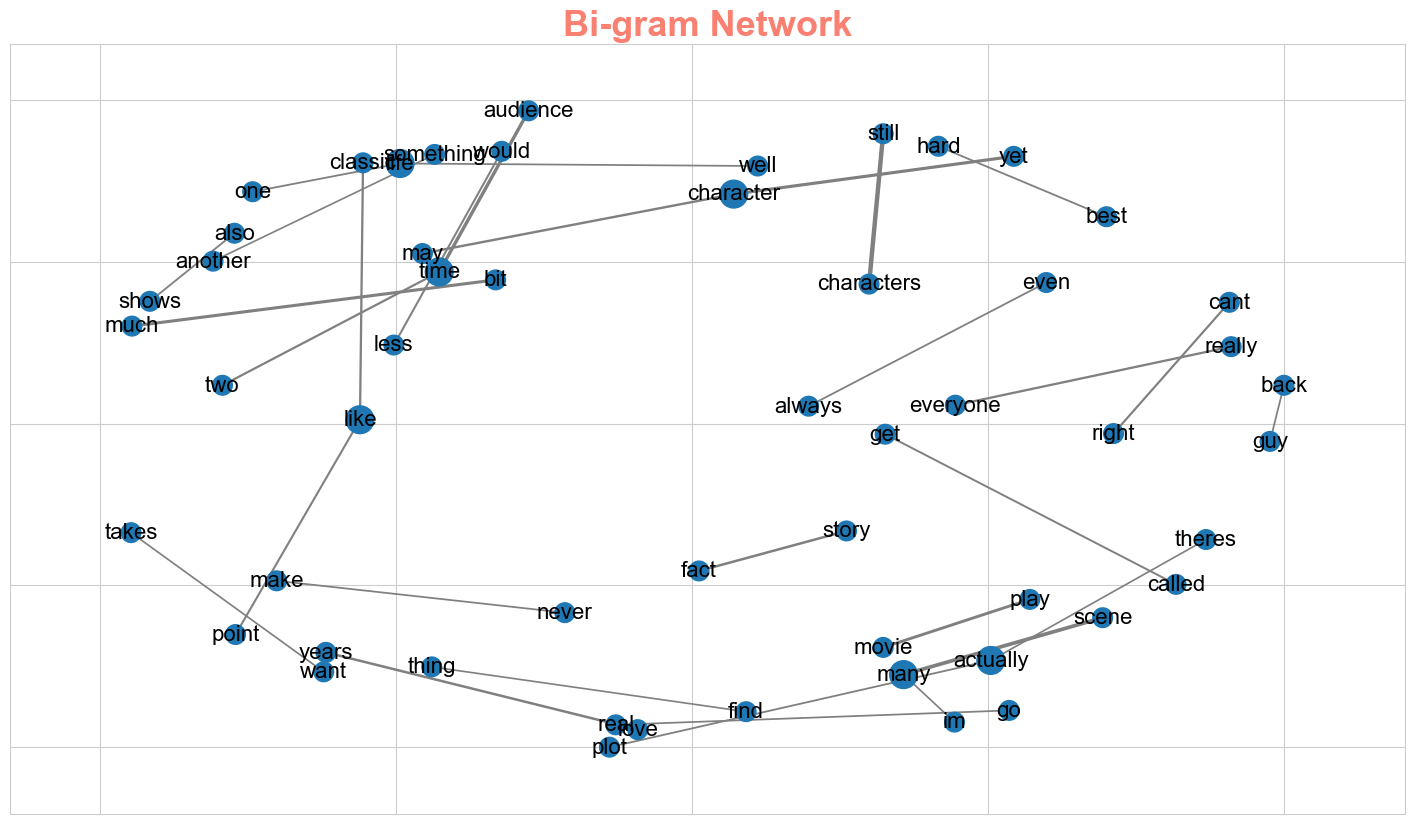

In [31]:
# 네트워크 객체를 생성
G = nx.Graph()

# 노드 간의 연결 생성
for v in bigram_counts.most_common(30):
    G.add_edge(v[0][0], v[0][1], weight=(v[1] * 10))
fig, ax = plt.subplots(figsize=(18, 10))

pos = nx.spring_layout(G, k=8)

d = dict(nx.degree(G))
edges = G.edges()
weights = [G[u][v]['weight']/1000 for u,v in edges]

# 네트워크를 그림
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=weights,
                 node_size = [v * 200 for v in d.values()],
                 edge_color='grey',
                 #node_color='tomato',
                 with_labels = True,
                 ax=ax)

ax.set_title('Bi-gram Network',
             fontdict={'fontsize': 26,
            'fontweight': 'bold',
            'color': 'salmon',
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'},
             loc='center')
plt.show()